In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
n_measurements = 10

hist_distances = np.zeros((n_measurements, 15))

for i in range(n_measurements):
    for r_i, r in enumerate(np.arange(0.1, 1.51, 0.1)):
        data = pd.read_csv(f'seperate_{i}/rate_{round(r, 1)}.csv')
        data_in_range = data[(data['time'] > 20) & (data['x'] > 5) & (data['x'] < 25) & (data['y'] > 0) & (data['y'] < 5)]

        group_0 = data_in_range[data_in_range['group_id'] == 0]['y']
        group_1 = data_in_range[data_in_range['group_id'] == 1]['y']

        hist_0, _ = np.histogram(group_0, density=True, bins=10, range=(0.1, 4.9))
        hist_1, _ = np.histogram(group_1, density=True, bins=10, range=(0.1, 4.9))

        hist_distances[i, r_i] = np.abs(hist_0-hist_1).sum()

#         group_0.hist(density=True, alpha=0.5)
#         group_1.hist(density=True, alpha=0.5)
#         plt.show()

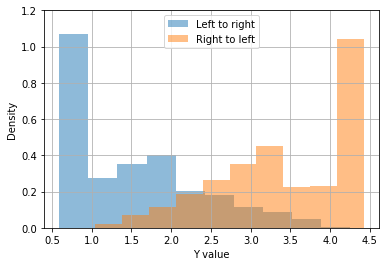

In [7]:
data = pd.read_csv(f'seperate_0/rate_1.0.csv')
data_in_range = data[(data['time'] > 20) & (data['x'] > 5) & (data['x'] < 25) & (data['y'] > 0) & (data['y'] < 5)]
group_0 = data_in_range[data_in_range['group_id'] == 0]['y']
group_1 = data_in_range[data_in_range['group_id'] == 1]['y']
group_0.hist(density=True, alpha=0.5, label='Left to right')
group_1.hist(density=True, alpha=0.5, label='Right to left')
plt.xlabel('Y value')
plt.ylabel('Density')
plt.legend(loc='upper center')
plt.ylim((0, 1.2))
plt.savefig('plots/s_hist_small_diff.png', dpi=150)
plt.show()

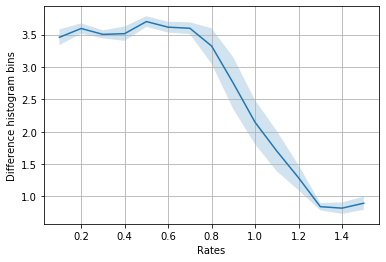

In [9]:
mean = hist_distances.mean(axis=0)
std = hist_distances.std(axis=0) / np.sqrt(n_measurements)
plt.plot(np.arange(0.1, 1.51, 0.1), mean)
plt.fill_between(np.arange(0.1, 1.51, 0.1), mean - std, mean + std, alpha=0.2)
plt.ylabel('Difference histogram bins')
plt.xlabel('Rates')
plt.grid()
plt.savefig('plots/s_diff_hists.png', dpi=150)
plt.show()

In [10]:
hist_distances

array([[3.50698391, 3.75749064, 3.40555953, 3.8086731 , 3.93469982,
        3.41599602, 3.31354622, 4.11278799, 0.73375314, 2.90193996,
        0.6405504 , 2.52791818, 0.6049758 , 0.76227447, 1.06090918],
       [3.87289056, 3.57271883, 3.77501572, 2.90931862, 3.37720035,
        3.72298273, 3.36068227, 2.62895981, 3.87933737, 4.02546398,
        3.61106833, 0.9950851 , 0.68359928, 0.43215487, 0.72257415],
       [3.7606999 , 3.33227548, 3.10368417, 3.41963853, 3.97824356,
        3.10693792, 3.77435098, 4.02800517, 2.98341535, 0.58930324,
        1.48605465, 0.96005215, 1.13143679, 0.72529534, 1.41069539],
       [2.73183489, 3.96363846, 3.60542276, 3.7775911 , 3.8579692 ,
        3.80019263, 3.7149283 , 3.76461572, 1.05819141, 1.42927644,
        2.53912586, 0.9053684 , 0.72441872, 1.51641006, 0.74583362],
       [2.87159024, 3.62181465, 3.57916635, 3.81638473, 3.59247733,
        4.0671895 , 3.7879467 , 3.47095418, 3.86169973, 3.56869279,
        1.11700557, 1.08796789, 0.74852889, 